In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import pandas as pd

In [55]:
class Draw:
    
    """
    It's a class for drawing grafics
    Type of grafic is determined using `name` parameter = 'Time' or 'Accelerate'
    
    In order to draw 1 graph, you can use the `draw_grafic` function
        size_input_data: the size of the input data involved in the experiment
        
        x: If the x-axis has special values,you can set it yourself,
        otherwise it will just be an enumeration from 1 to n.
        
        info: additional information in the header
    """
    
    @staticmethod
    def draw_grafic(dir: str,
                    name: str,
                    size_input_data: int = None,
                    x: list = None,
                    info: str = None,
                    x_label: str = None,
                    y_label: str = None
                    ) -> None:

        y = list()
        with open(dir, 'r') as file:
            for line in file:
                y.append(float(line))

        if name == 'Accelerate':
            simple = y[0]
            y = [simple / res if res > 0.0 else 0.0 for res in y]
            
        if not x:
            x = [(k + 1) for k in range(len(y))]
            
        plt.plot(x, y, color="blue", marker="o")
        
        plt.xlabel("num processors" if not x_label else x_label)
        if name == 'Time':
           plt.ylabel(f"{name} (seconds)" if not y_label else y_label)
        else:
            plt.ylabel(name if not y_label else y_label)
         
        if size_input_data:
            name = name + f", N={str(size_input_data)}"
        if info is not None:
            name = name + ", " + info
        
        plt.title(name)
        plt.grid(True)
        
    @staticmethod
    def draw_grafics(dirs: list[str],
                    labels: list[str],
                    name: str,
                    size_input_data: int = None,
                    x: list = None,
                    info: str = None,
                    x_label: str = None,
                    y_label: str = None
                    ) -> None:
        
        for dir, label in zip(dirs, labels):
            y = []
            with open(dir, 'r') as file:
                for line in file:
                    y.append(float(line))
                    
            if not x:
                x = [(k + 1) for k in range(len(y))]
            
            if name == 'Accelerate':
                simple = y[0]
                y = [simple / res if res > 0.0 else 0.0 for res in y]
                
            plt.plot(x, y, label=label, marker="o")
            
        plt.xlabel("num processors" if not x_label else x_label)
        if name == 'Time':
           plt.ylabel(f"{name} (seconds)" if not y_label else y_label)
        else:
            plt.ylabel(name if not y_label else y_label)
        
        if size_input_data:
            name = name + f", N={str(size_input_data)}"
        if info is not None:
            name = name + ", " + info
        
        plt.legend()
        plt.title(name)
        plt.grid(True)
        
    @staticmethod
    def draw_3D_grafic(dir: str,
                       x_label: str,
                       y_label: str,
                       z_label: str,
                       title: str
        ) -> None:
        
        fig = plt.figure(figsize=(12, 9))
        ax = fig.add_subplot(111, projection='3d')
        
        x = list()
        y = list()
        z = list()
        
        with open(dir, 'r') as file:
            for line in file:
                line = line.split(' ')
                x.append(int(line[0]))
                y.append(int(line[1]))
                z.append(float(line[2]))
        
        ax.scatter(x, y, z, c='r', marker='o')
        
        # Добавление аннотаций и линий к каждой точке
        for i in range(len(x)):
            # Линия от точки к плоскости z=0
            ax.plot([x[i], x[i]], [y[i], y[i]], [0, z[i]], color='gray', linestyle='--')
            
            # Аннотация с координатами
            label = f'({z[i]:.2f})'
            ax.text(x[i], y[i], z[i], label, fontsize=8, color='blue')
        
        # Настройки осей
        ax.set_xlabel(x_label, labelpad=0)
        ax.set_ylabel(y_label, labelpad=0)
        ax.set_zlabel(z_label, labelpad=0)
        ax.set_title(title) 
    
        
        plt.tight_layout()
        
        
    

In [56]:
labels = ["Bcast", "Scatter"]
dirs = [f"ssh/2/results{label}.log" for label in labels]
x = [1] + [(i + 1) * 2 for i in range(16)]

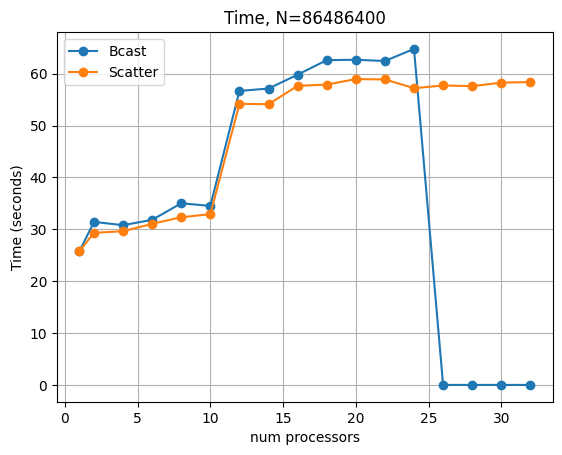

In [57]:
Draw.draw_grafics(dirs, labels, 'Time', 86486400, x)

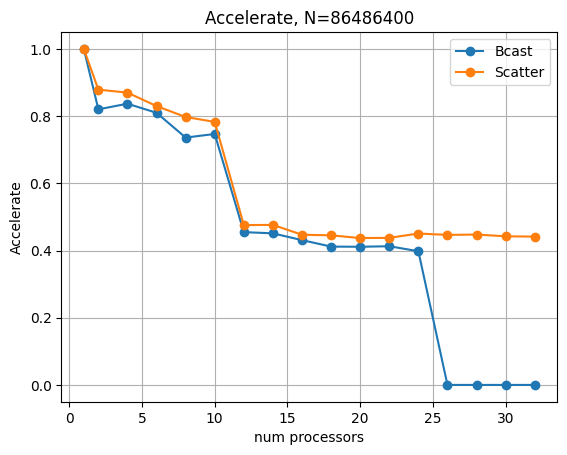

In [58]:
Draw.draw_grafics(dirs, labels, 'Accelerate', 86486400, x)

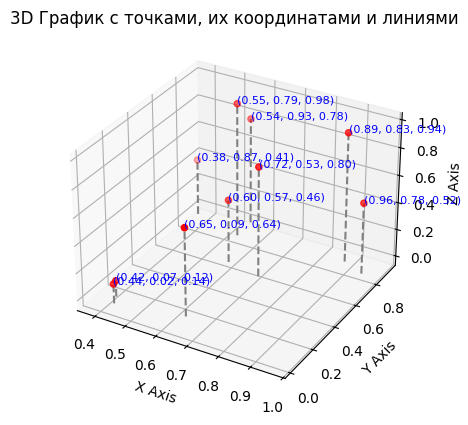

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Генерация случайных данных
np.random.seed(0)
x = np.random.rand(10)
y = np.random.rand(10)
z = np.random.rand(10)

# Создание фигуры
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение точек
ax.scatter(x, y, z, c='r', marker='o')

# Добавление аннотаций и линий к каждой точке
for i in range(len(x)):
    # Линия от точки к плоскости z=0
    ax.plot([x[i], x[i]], [y[i], y[i]], [0, z[i]], color='gray', linestyle='--')
    
    # Аннотация с координатами
    label = f'({x[i]:.2f}, {y[i]:.2f}, {z[i]:.2f})'
    ax.text(x[i], y[i], z[i], label, fontsize=8, color='blue')

# Настройки осей
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title("3D График с точками, их координатами и линиями")


plt.show()

# №1

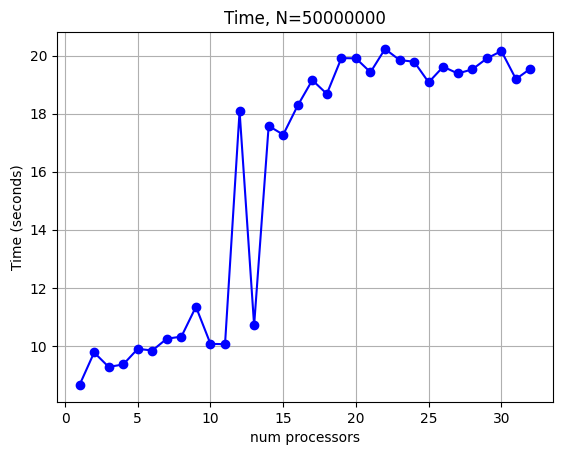

In [60]:
Draw.draw_grafic("ssh/1/results.log", 'Time', 5*10**7)

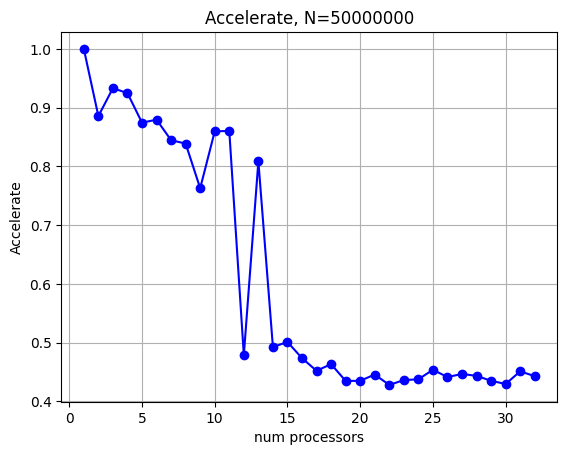

In [61]:
Draw.draw_grafic("ssh/1/results.log", 'Accelerate', 5*10**7)

# №2

In [62]:
labels = ["Bcast", "Scatter"]
dirs = [f"ssh/2/results{label}.log" for label in labels]
x = [1] + [(i + 1) * 2 for i in range(16)]

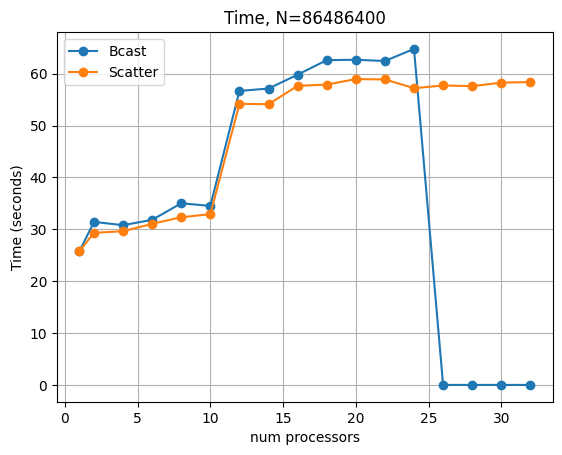

In [63]:
Draw.draw_grafics(dirs, labels, 'Time', 86486400, x)

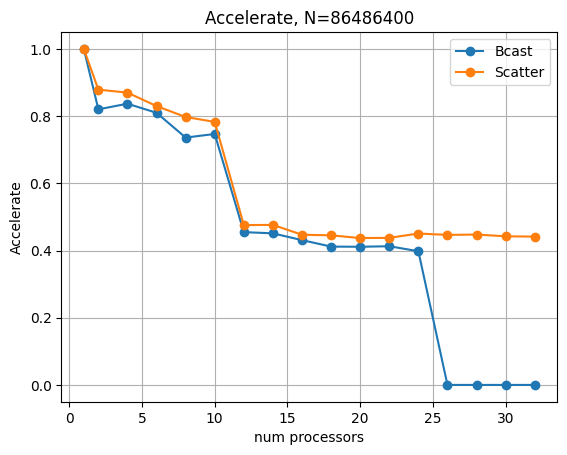

In [64]:
Draw.draw_grafics(dirs, labels, 'Accelerate', 86486400, x)

# №3

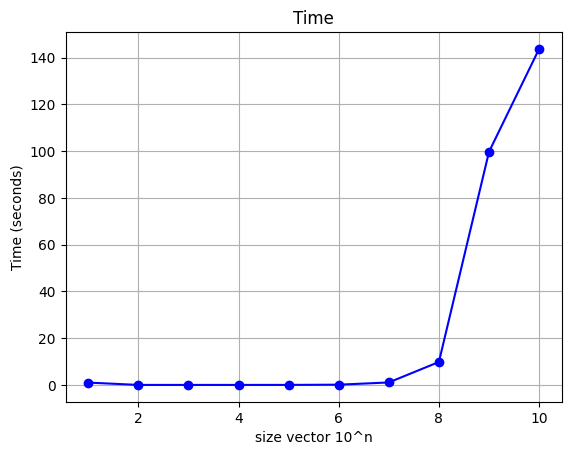

In [65]:
Draw.draw_grafic("ssh/3/results.log", 'Time', x_label='size vector 10^n')

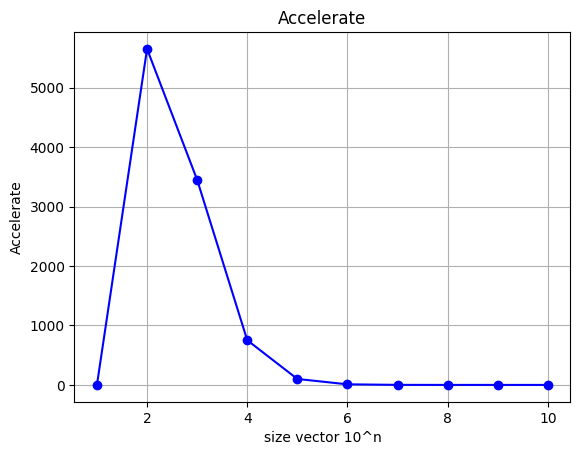

In [66]:
Draw.draw_grafic("ssh/3/results.log", 'Accelerate', x_label='size vector 10^n')

# №4

In [67]:
labels = ["Fox", "Striped"]
dirs = [f"ssh/4/results{label}.log" for label in ['F', 'S']]
x = [(i + 1)**2 for i in range(10)]

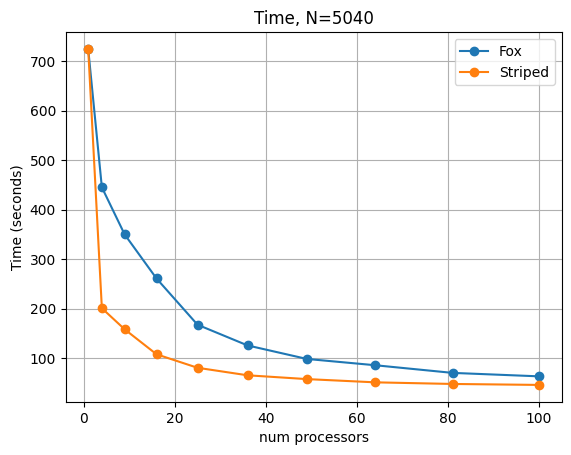

In [68]:
Draw.draw_grafics(dirs, labels, 'Time', 5040, x)

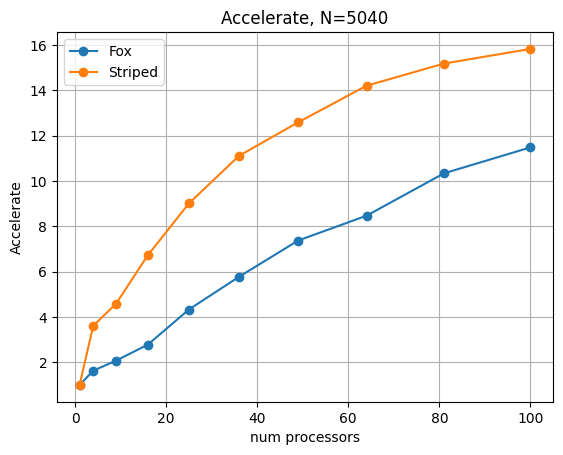

In [69]:
Draw.draw_grafics(dirs, labels, 'Accelerate', 5040, x)

# №5

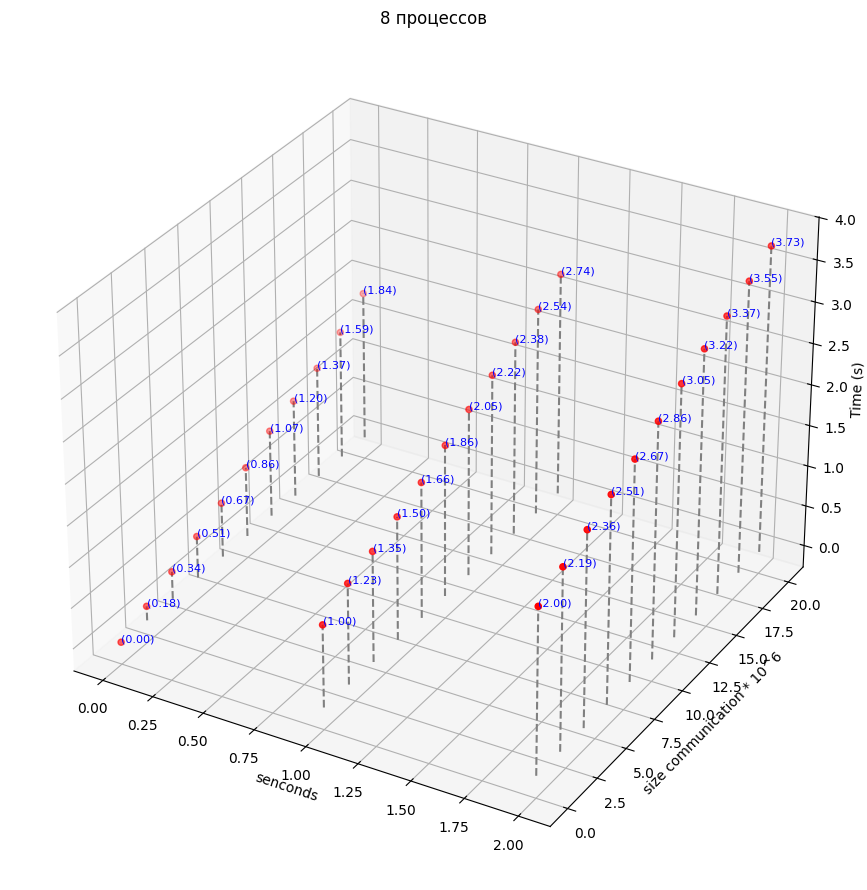

In [70]:
Draw.draw_3D_grafic("ssh/5/results_8.log", 'senconds', 'size communication * 10^6', 'Time (s)', '8 процессов')

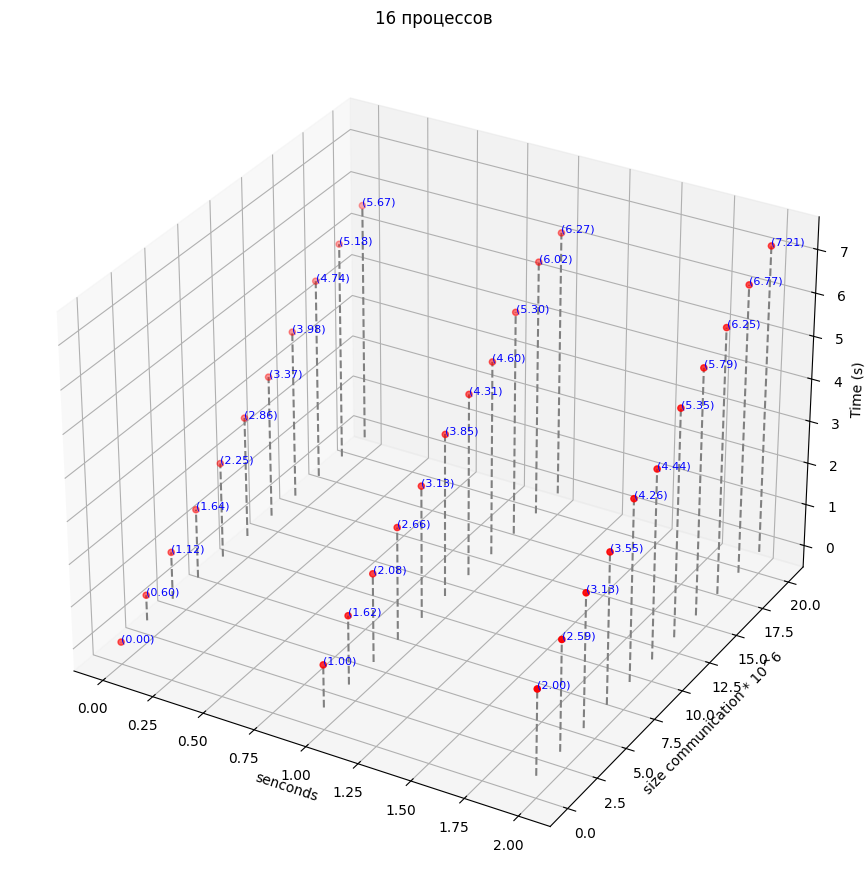

In [71]:
Draw.draw_3D_grafic("ssh/5/results_16.log", 'senconds', 'size communication * 10^6', 'Time (s)', '16 процессов')

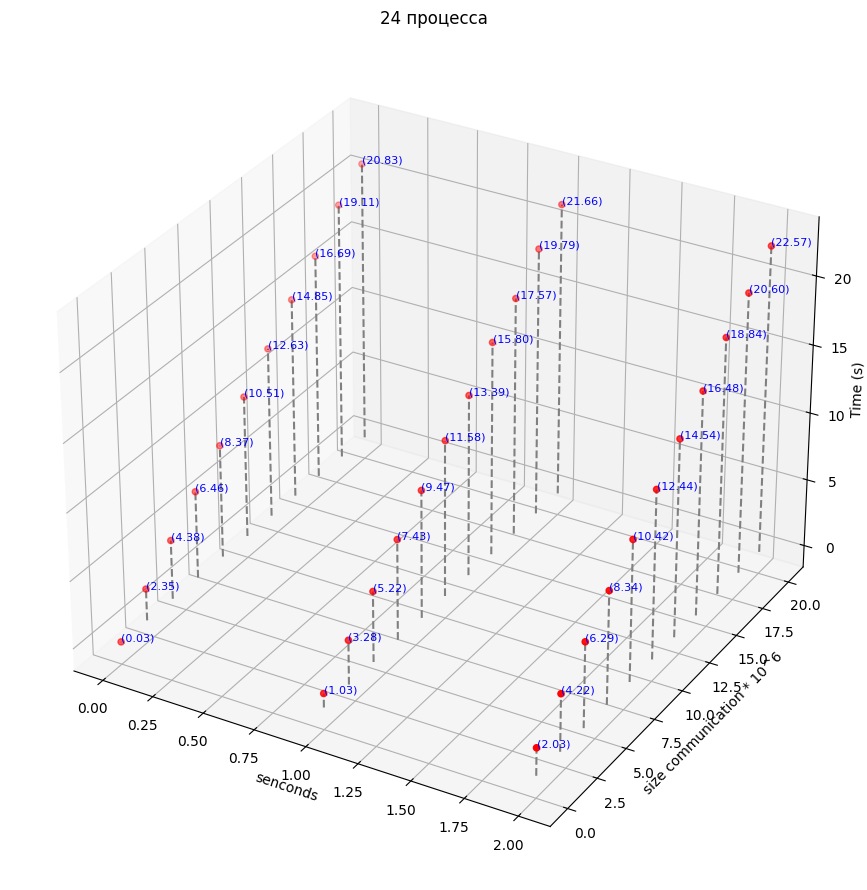

In [72]:
Draw.draw_3D_grafic("ssh/5/results_24.log", 'senconds', 'size communication * 10^6', 'Time (s)', '24 процесса')

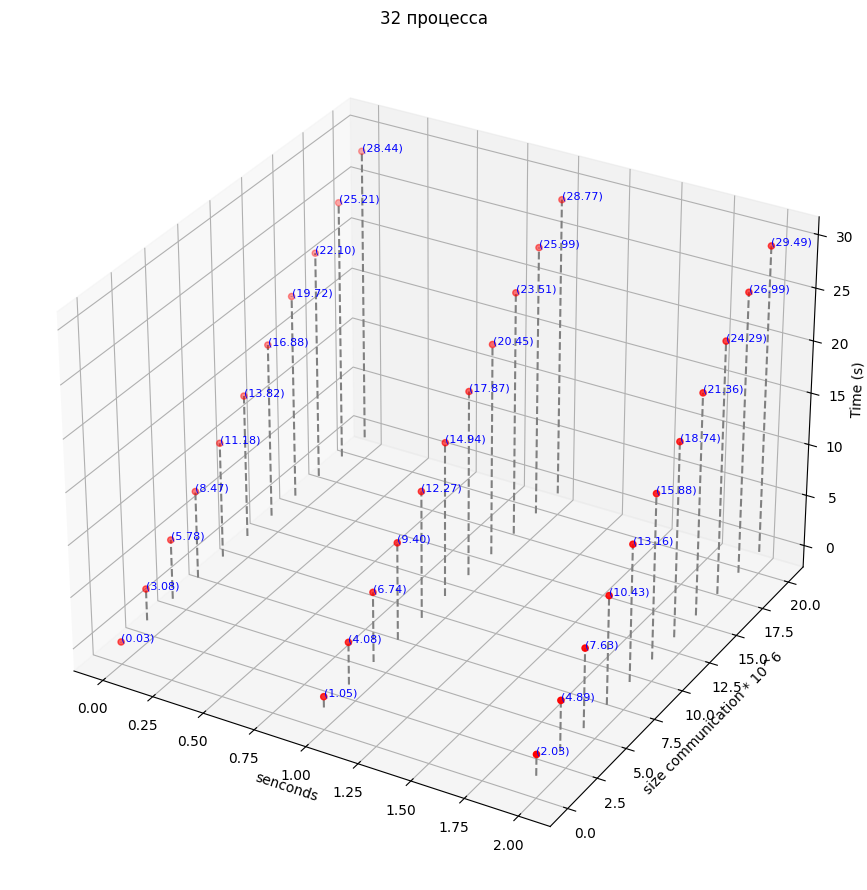

In [73]:
Draw.draw_3D_grafic("ssh/5/results_32.log", 'senconds', 'size communication * 10^6', 'Time (s)', '32 процесса')

# №6

In [83]:
labels = ['Buff', 'Simple', 'Sync']
dirs = [f"ssh/6/results{label}.log" for label in labels]
x = [(i + 1)**2 for i in range(10)]

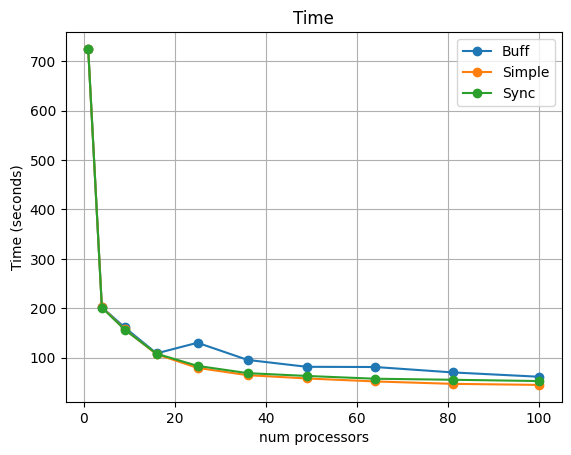

In [84]:
Draw.draw_grafics(dirs, labels, 'Time', x=x)

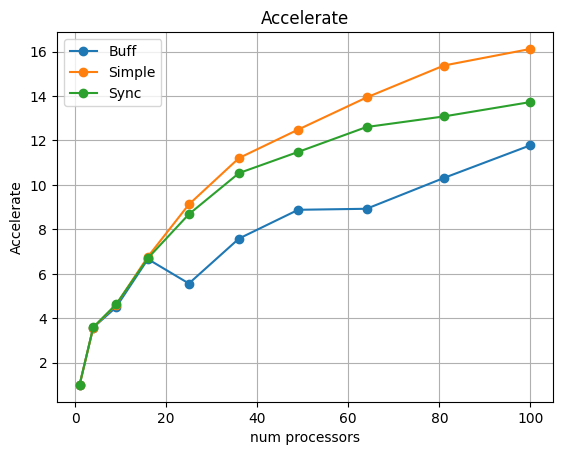

In [85]:
Draw.draw_grafics(dirs, labels, 'Accelerate', x=x)

# №7

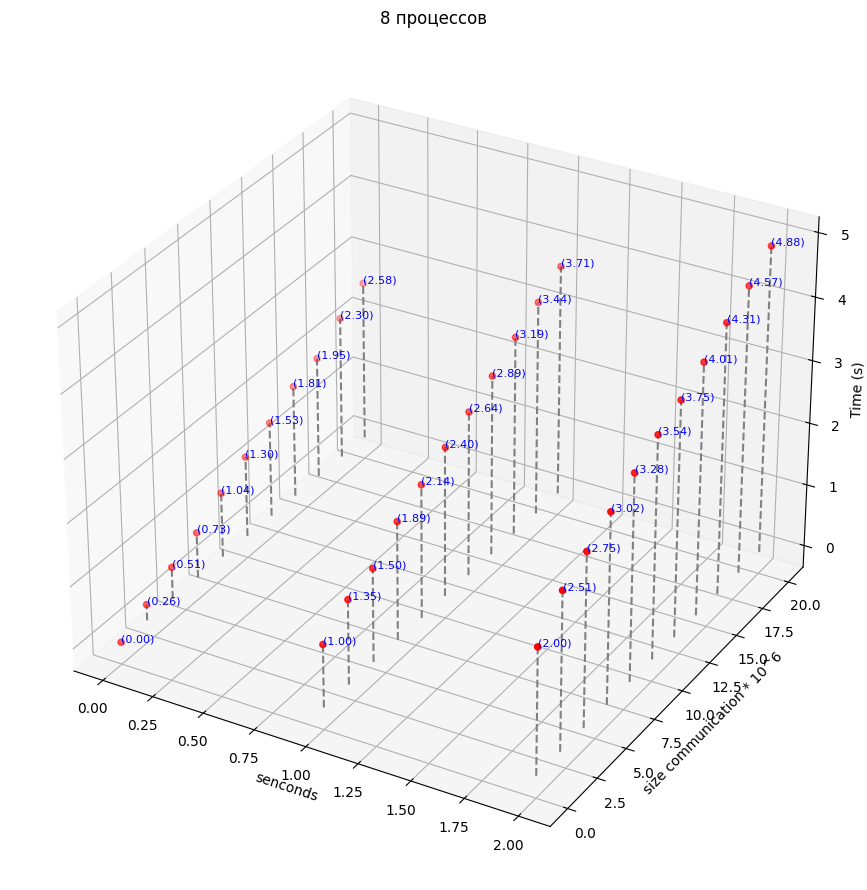

In [74]:
Draw.draw_3D_grafic("ssh/7/results_8.log", 'senconds', 'size communication * 10^6', 'Time (s)', '8 процессов')

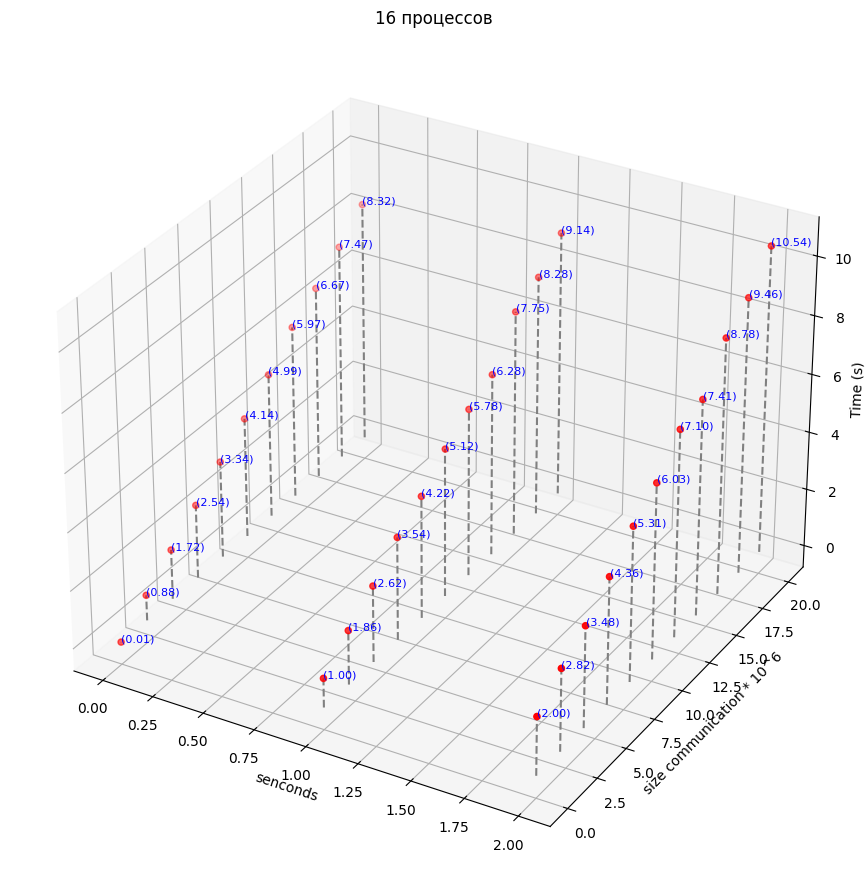

In [75]:
Draw.draw_3D_grafic("ssh/7/results_16.log", 'senconds', 'size communication * 10^6', 'Time (s)', '16 процессов')

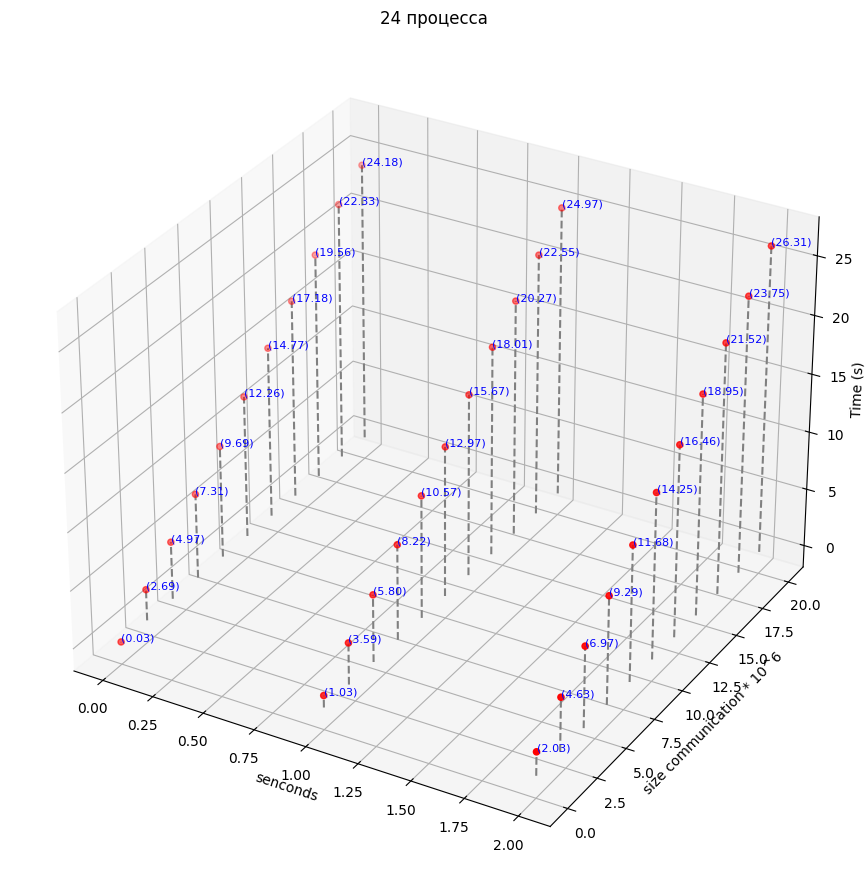

In [76]:
Draw.draw_3D_grafic("ssh/7/results_24.log", 'senconds', 'size communication * 10^6', 'Time (s)', '24 процесса')

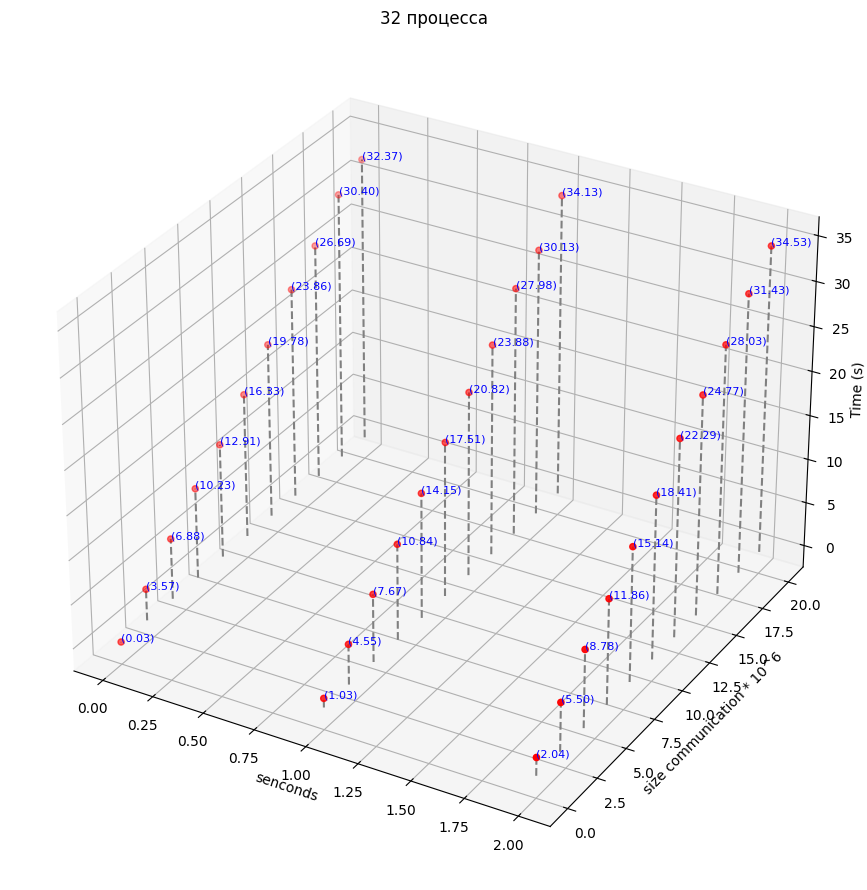

In [77]:
Draw.draw_3D_grafic("ssh/7/results_32.log", 'senconds', 'size communication * 10^6', 'Time (s)', '32 процесса')

# №8

In [78]:
labels = ['Simple', 'SendRecv', 'SendRecvReplace']
dirs = [f"ssh/8/results{label}.log" for label in labels]

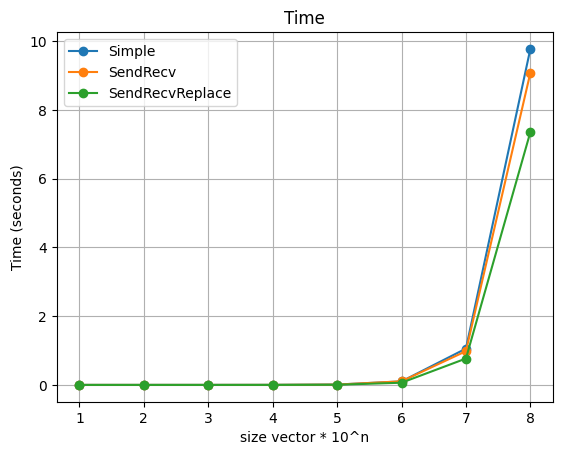

In [80]:
Draw.draw_grafics(dirs, labels, 'Time', x_label='size vector * 10^n')

# №9

In [88]:
labels = ['MPI', 'My realization']
x = [i*2 for i in range(1, 16 + 1)]

### Broadcast

In [101]:
x = [i*2 for i in range(1, 12 + 1)]
name = 'Broadcast'
size = 43243200
dirs = [f"ssh/9/results{name}-1.log", f"ssh/9/results{name}-0.log"]

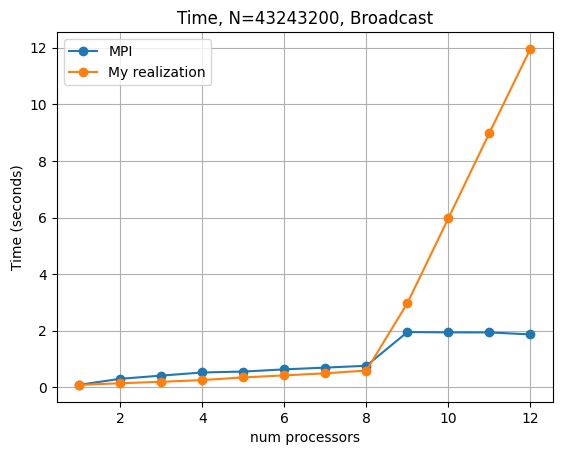

In [102]:
Draw.draw_grafics(dirs, labels, 'Time', size_input_data=size, info=name)

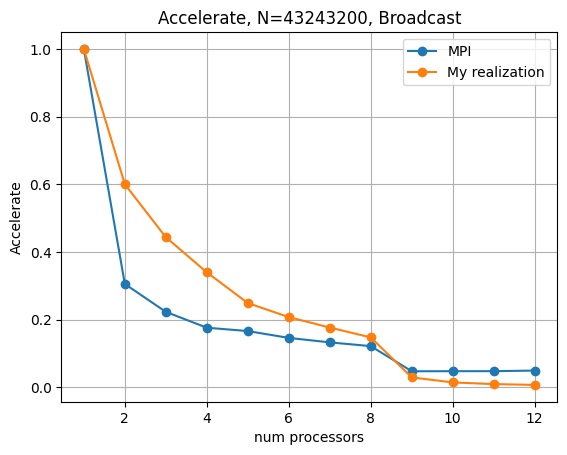

In [103]:
Draw.draw_grafics(dirs, labels, 'Accelerate', size_input_data=size, info=name)

### Reduce

In [104]:
name = 'Reduce'
size = 4324320
dirs = [f"ssh/9/results{name}-1.log", f"ssh/9/results{name}-0.log"]

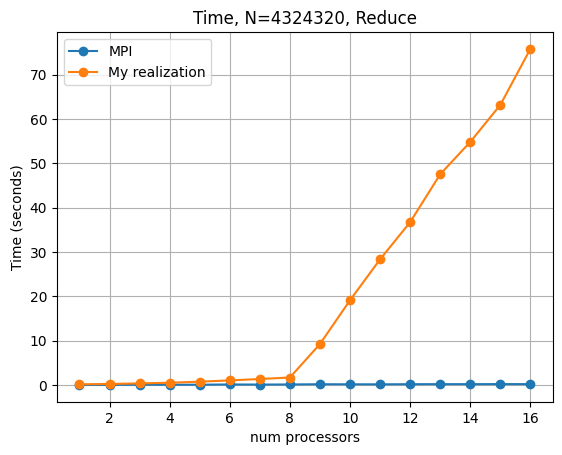

In [105]:
Draw.draw_grafics(dirs, labels, 'Time', size_input_data=size, info=name)

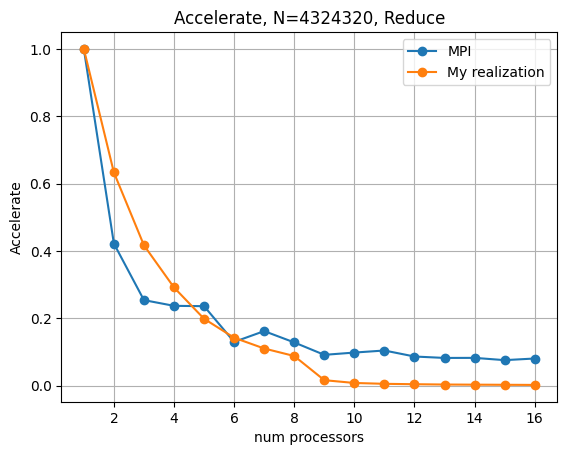

In [106]:
Draw.draw_grafics(dirs, labels, 'Accelerate', size_input_data=size, info=name)

### Scatter

In [107]:
name = 'Scatter'
size = 43243200
dirs = [f"ssh/9/results{name}-1.log", f"ssh/9/results{name}-0.log"]

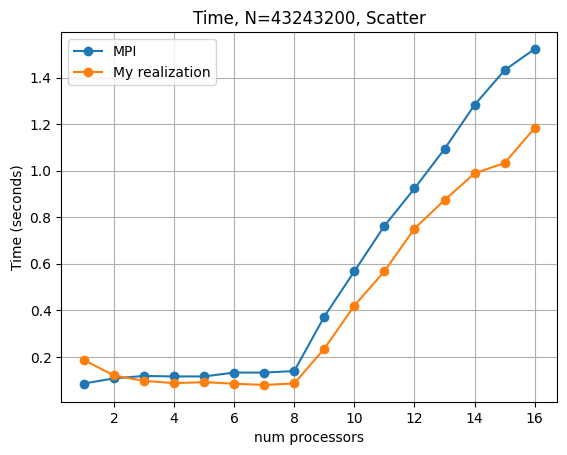

In [108]:
Draw.draw_grafics(dirs, labels, 'Time', size_input_data=size, info=name)

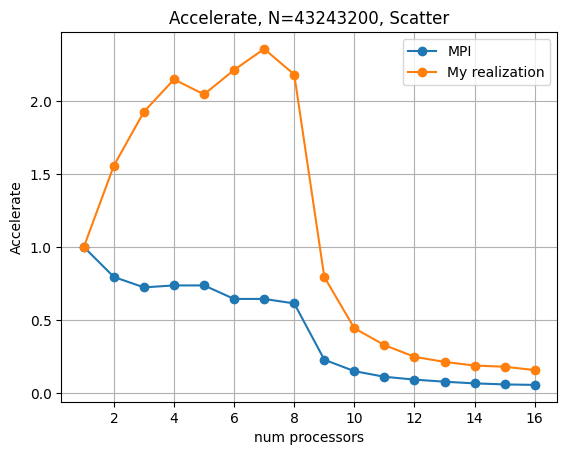

In [109]:
Draw.draw_grafics(dirs, labels, 'Accelerate', size_input_data=size, info=name)

### Gather

In [110]:
name = 'Gather'
size = 43243200
dirs = [f"ssh/9/results{name}-1.log", f"ssh/9/results{name}-0.log"]

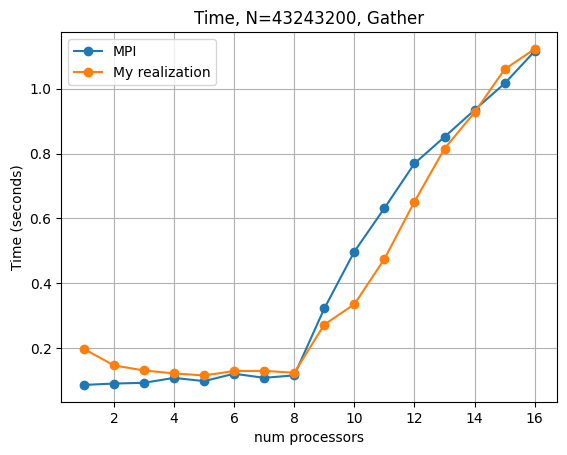

In [111]:
Draw.draw_grafics(dirs, labels, 'Time', size_input_data=size, info=name)

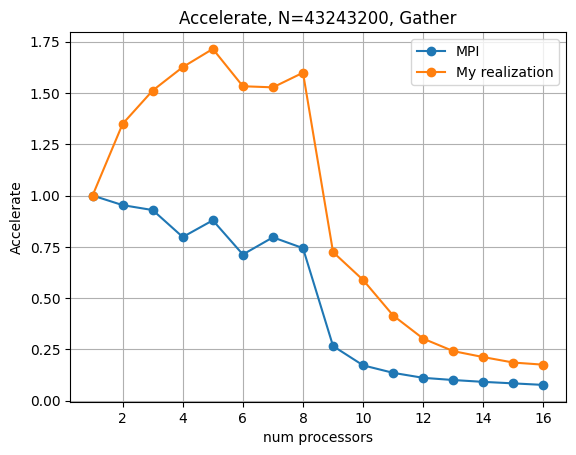

In [112]:
Draw.draw_grafics(dirs, labels, 'Accelerate', size_input_data=size, info=name)

### AlltoAll

In [114]:
name = 'AlltoAll'
size = 43243200
dirs = [f"ssh/9/results{name}-1.log", f"ssh/9/results{name}-0.log"]

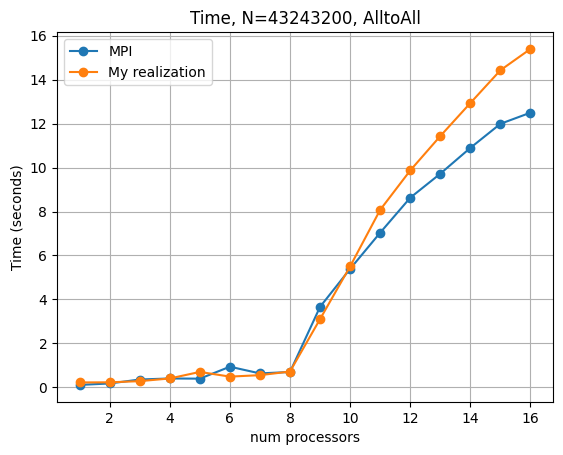

In [115]:
Draw.draw_grafics(dirs, labels, 'Time', size_input_data=size, info=name)

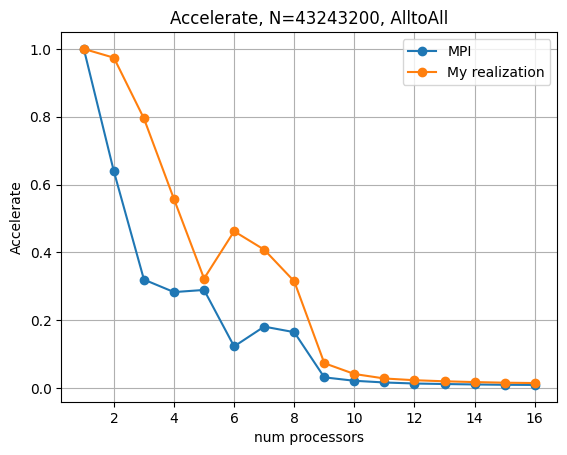

In [116]:
Draw.draw_grafics(dirs, labels, 'Accelerate', size_input_data=size, info=name)

### AllGather

In [117]:
name = 'AllGather'
size = 43243200
dirs = [f"ssh/9/results{name}-1.log", f"ssh/9/results{name}-0.log"]

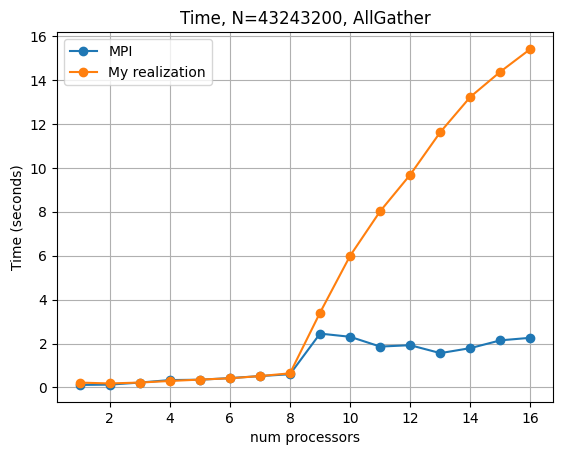

In [118]:
Draw.draw_grafics(dirs, labels, 'Time', size_input_data=size, info=name)

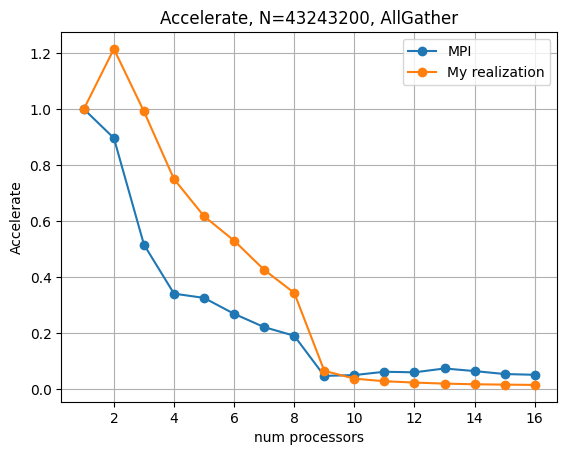

In [119]:
Draw.draw_grafics(dirs, labels, 'Accelerate', size_input_data=size, info=name)

# №10

In [ ]:
labels = ['Type', 'Simple', 'Pack']
dirs = [f"ssh/10/results{label}.log" for label in labels]
x = [i*2 for i in range(1, 16 + 1)]

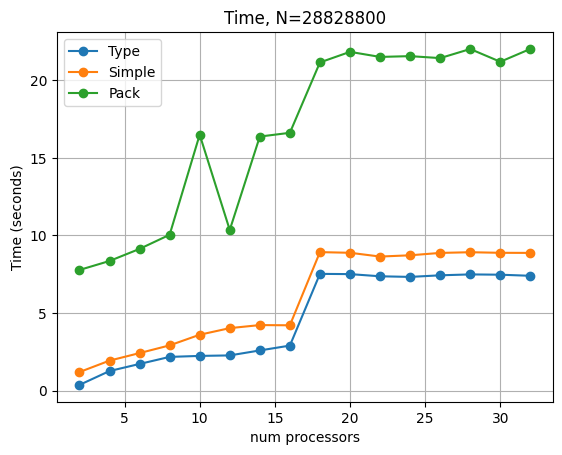

In [121]:
Draw.draw_grafics(dirs, labels, 'Time', 28828800, x=x)

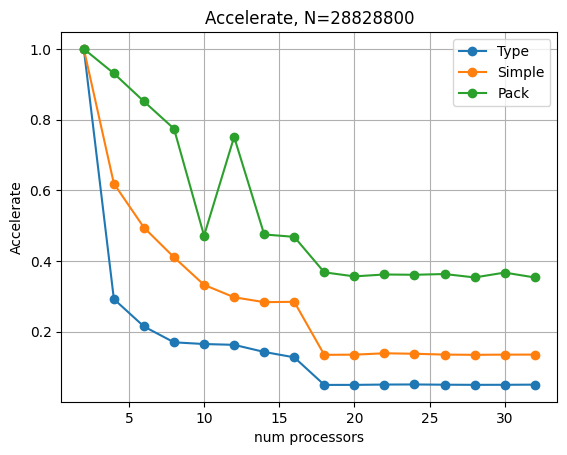

In [122]:
Draw.draw_grafics(dirs, labels, 'Accelerate', 28828800, x=x)

# №11

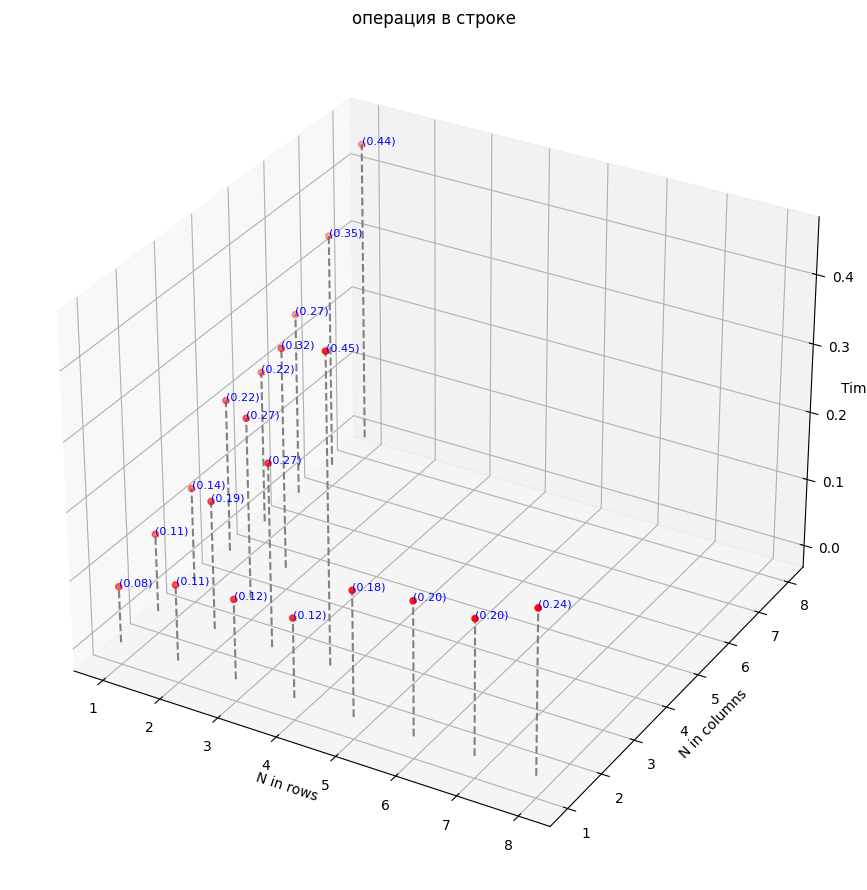

In [124]:
Draw.draw_3D_grafic("ssh/11/results-0.log", 'N in rows', 'N in columns', 'Time', 'операция в строке')

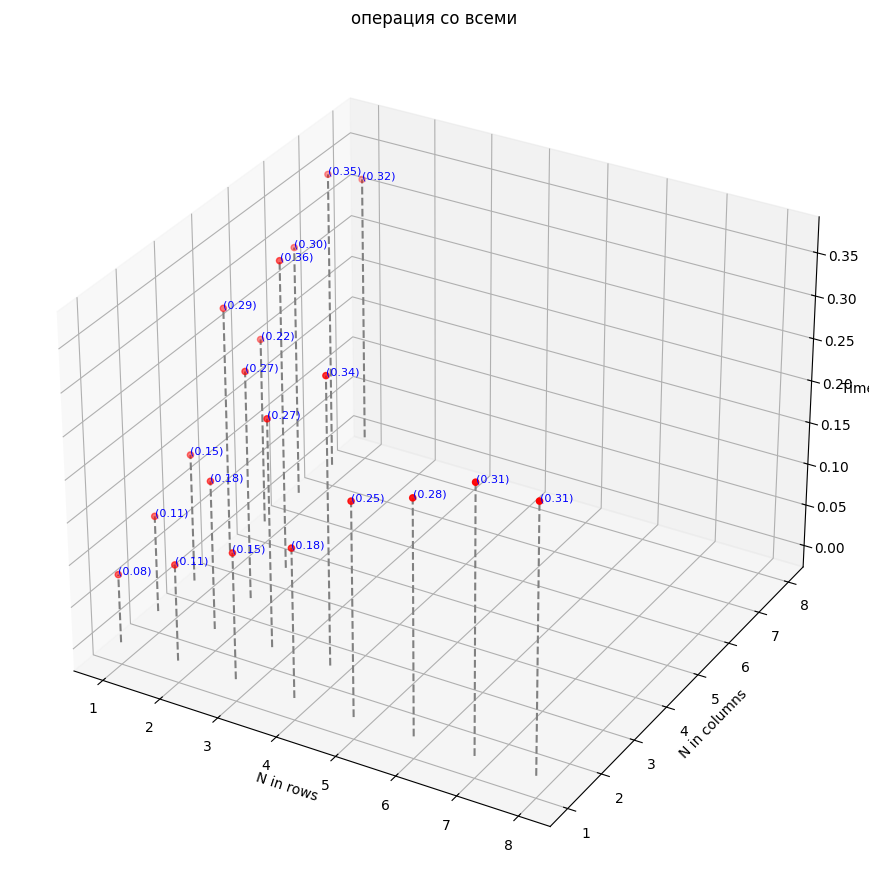

In [126]:
Draw.draw_3D_grafic("ssh/11/results-1.log", 'N in rows', 'N in columns', 'Time', 'операция со всеми')

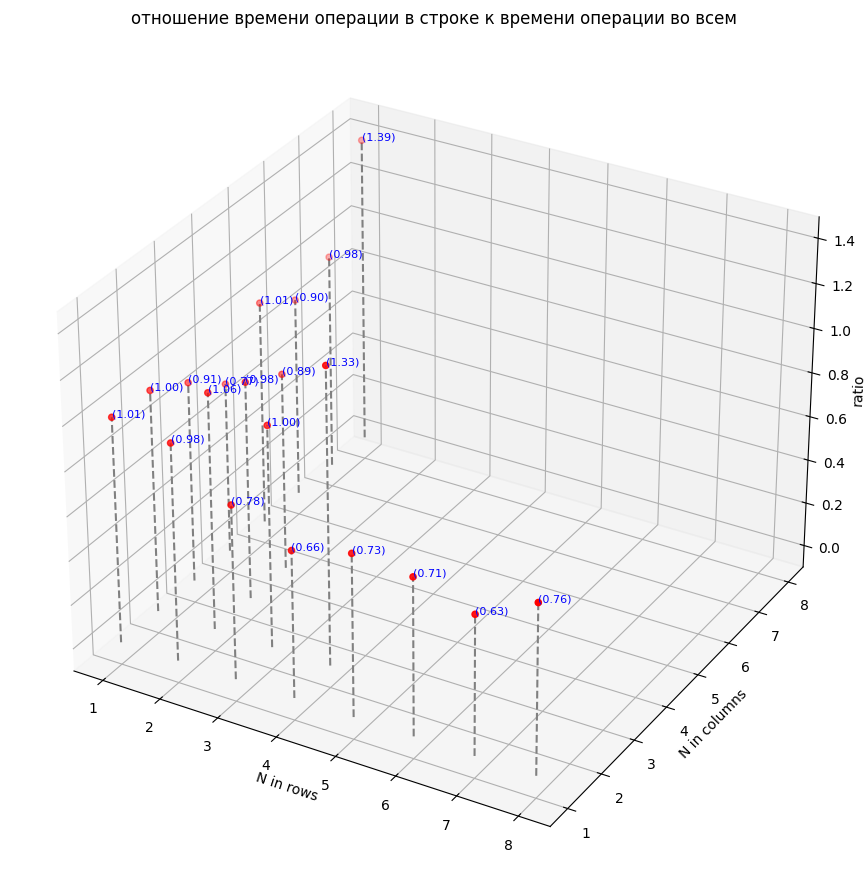

In [131]:
Draw.draw_3D_grafic("ssh/11/resultsRatio.log", 'N in rows', 'N in columns', 'ratio', 'отношение времени операции в строке к времени операции во всем')